In [71]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import numpy as np

In [72]:
# Read in the 311 data
df = pd.read_csv("tmpmraitf9s.csv")

/Users/sabrina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
df.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101000295615,2011-07-01 02:28:04,2011-08-15 02:28:04,2011-08-01 15:21:46,ONTIME,Closed,Case Closed Case Resolved No Sidewalk and poor...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,E5,West Roxbury,12,Ward 20,2017,INTERSECTION Corey St & Lagrange St,NaN,42.3003,-71.1698,Self Service
1,101000295616,2011-07-01 03:03:48,2011-07-15 03:03:48,2011-07-22 16:13:45,OVERDUE,Closed,Case Closed Case Resolved completed,Street Light Outages,Public Works Department,Street Lights,...,E18,Hyde Park,10,Ward 18,1816,235 Fairmount Ave,2136.0,42.2496,-71.1156,Self Service
2,101000295617,2011-07-01 03:12:31,NaN,2011-07-01 06:12:38,ONTIME,Closed,Case Closed Case Resolved,Highway Maintenance,Public Works Department,Highway Maintenance,...,C11,Dorchester,7,Ward 13,1309,INTERSECTION Dorchester Ave & Hallam St,NaN,42.3144,-71.0569,Constituent Call
3,101000295618,2011-07-01 03:43:07,NaN,2011-07-05 09:16:10,ONTIME,Closed,Case Closed Case Noted,Notification,Mayor's 24 Hour Hotline,Notification,...,E13,Jamaica Plain,11,Ward 10,1006,7 Edge Hill St,2130.0,42.3243,-71.1060,Constituent Call
4,101000295619,2011-07-01 05:35:41,2011-08-15 05:35:41,2011-10-17 12:33:28,OVERDUE,Closed,Case Closed Case Noted Duplicate request,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,D4,Fenway / Kenmore / Audubon Circle / Longwood,14,Ward 21,2102,INTERSECTION Arundel St & Beacon St,NaN,42.3471,-71.1033,Self Service


In [74]:
# check the NaN value
df.isnull().sum()

case_enquiry_id                         0
open_dt                                 0
target_dt                          280303
closed_dt                          134717
ontime                                673
case_status                             0
closure_reason                          0
case_title                            533
subject                                 0
reason                                  0
type                                    0
queue                                   0
department                              0
submittedphoto                    1198004
closedphoto                       1375502
location                                0
fire_district                        3743
pwd_district                          944
city_council_district                 231
police_district                       704
neighborhood                         1735
neighborhood_services_district        231
ward                                  177
precinct                          

In [75]:
# Neighborhood column is important, so let's check the neighborhood column 
df.neighborhood.unique()

array(['West Roxbury', 'Hyde Park', 'Dorchester', 'Jamaica Plain',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'Back Bay',
       'Roslindale', 'Roxbury', 'South Boston / South Boston Waterfront',
       'Greater Mattapan', 'East Boston', 'Charlestown',
       'Downtown / Financial District', 'Allston / Brighton',
       'Beacon Hill', 'Boston', 'South End', ' ', 'Allston', 'Brighton',
       'Mission Hill', 'South Boston', nan, 'Mattapan', 'Chestnut Hill'],
      dtype=object)

In [76]:
# It seems that there are some nan and ' ' value in the neighborhood column
# Let's see the dataset to try to find out the neighborhood name
df[df.neighborhood == ' '].head()
# These rows have the same latitude and longitude values
# The latitude and longitude indicate the callers' were from Downtown area

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
129,101000295886,2011-07-01 11:18:54,2011-07-15 11:18:51,2011-07-01 11:22:14,ONTIME,Closed,Case Closed Case Noted case cancelled. just in...,General Comments For a Program or Policy,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
166,101000295962,2011-07-01 14:15:14,2011-07-31 14:15:13,2011-07-08 09:48:36,ONTIME,Closed,Case Closed NOVIO: No Violation Found/No Cause,Rodent Activity,Inspectional Services,Environmental Services,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
186,101000296008,2011-07-01 16:59:36,2011-07-08 16:59:35,2012-02-09 16:40:51,OVERDUE,Closed,Case Closed ROA: Refer to Other Agency/Division,Zoning,Inspectional Services,Building,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
244,101000296051,2011-07-01 23:06:14,2011-07-31 23:06:11,2011-07-18 11:59:40,ONTIME,Closed,Case Closed VIOISS: Violation Filed,Pigeon Infestation,Inspectional Services,Environmental Services,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
253,101000296081,2011-07-02 08:40:12,2011-07-18 08:40:12,NaN,OVERDUE,Open,,Other: Complaint,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call


In [8]:
df.loc[df["neighborhood"]==' ', "neighborhood"] = 'Downtown / Financial District'

In [9]:
# I decided to drop these 1735 rows that contain null value in neighborhood
len(df[df.neighborhood.isnull()])

1735

In [10]:
df = df.dropna(subset=["neighborhood"])

In [11]:
# I reclassified the neighborhood areas because I want to merge it with other dataset
df.loc[df["neighborhood"]=="Downtown / Financial District", "neighborhood"] = 'North End'
df.loc[df["neighborhood"]=="Boston", "neighborhood"] = 'North End'
df.loc[df["neighborhood"]=="Fenway / Kenmore / Audubon Circle / Longwood", "neighborhood"] = 'Fenway'
df.loc[df["neighborhood"]=="South Boston / South Boston Waterfront", "neighborhood"] = "South Boston" 
df.loc[df["neighborhood"]=="Allston", "neighborhood"] = "Allston / Brighton" 
df.loc[df["neighborhood"]=="Brighton", "neighborhood"] = "Allston / Brighton" 
df.loc[df["neighborhood"]=="Greater Mattapan", "neighborhood"] = "Mattapan" 

In [12]:
# Convert a non-null object to datetime object and slice the year
df["open_dt"] = pd.to_datetime(df["open_dt"])
df["year"] = df["open_dt"].dt.year

In [13]:
# Select only the 311 data containing "Needle Pickup" as a request
needle =  df[df["type"]=="Needle Pickup"]

In [14]:
# Grab only the columns I want
needle_sub = needle[["open_dt","year", "neighborhood", "latitude", "longitude", 'location','location_street_name', 'location_zipcode']]

In [15]:
needle_sub.head()

,open_dt,year,neighborhood,latitude,longitude,location,location_street_name,location_zipcode
336222,2015-05-22 09:24:00,2015,South Boston,42.3271,-71.0525,INTERSECTION of Logan Way & Old Colony Ave So...,INTERSECTION Logan Way & Old Colony Ave,NaN
336689,2015-05-25 13:08:00,2015,South End,42.3387,-71.0759,INTERSECTION of W Concord St & Shawmut Ave Ro...,INTERSECTION W Concord St & Shawmut Ave,NaN
336708,2015-05-25 16:34:00,2015,Back Bay,42.3470,-71.0865,INTERSECTION of Saint Cecilia St & Scotia St ...,INTERSECTION Saint Cecilia St & Scotia St,NaN
337434,2015-05-27 12:52:00,2015,Roxbury,42.3215,-71.0772,106 Blue Hill Ave Roxbury MA 02119,106 Blue Hill Ave,2119.0
338328,2015-05-29 16:43:00,2015,South Boston,42.3272,-71.0504,1005 Columbia Rd South Boston MA 02127,1005 Columbia Rd,2127.0


In [16]:
needle_sub.to_csv("allYear_needle_pickup.csv")

In [17]:
# Store the column names into a list
ls = needle_sub["neighborhood"].unique().tolist()

In [18]:
# Divide the needle dataset by year
y2015 = needle_sub[needle_sub["year"]==2015]
y2016 = needle_sub[needle_sub["year"]==2016]
y2017 = needle_sub[needle_sub["year"]==2017]
y2018 = needle_sub[needle_sub["year"]==2018]
y2019 = needle_sub[needle_sub["year"]==2019]

# Divide the whold dataset by year
w_2015 = df[df["year"]==2015]
w_2016 = df[df["year"]==2016]
w_2017 = df[df["year"]==2017]
w_2018 = df[df["year"]==2018]
w_2019 = df[df["year"]==2019]

In [19]:
# Store the data into csv files
y2015.to_csv("needle_pickup_2015.csv")
y2016.to_csv("needle_pickup_2016.csv")
y2017.to_csv("needle_pickup_2017.csv")
y2018.to_csv("needle_pickup_2018.csv")
y2019.to_csv("needle_pickup_2019.csv")

# How many needles pickup requests from 2015 to 2019?

Between May 2015 and October 2019, 1,7081 discarded needles were reported. The number keeps rising from 2015 to 2019.

In [20]:
total = len(y2015) + len(y2016) + len(y2017) + len(y2018) + len(y2019)
print("Total Needle Pickup Requests from 2015 to 2019: "+str(total))

Total Needle Pickup Requests from 2015 to 2019: 17081


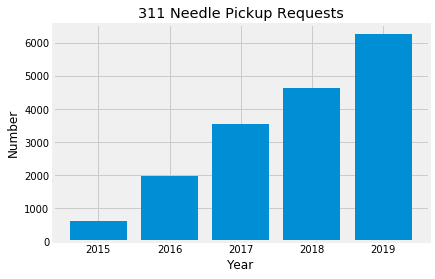

In [21]:
x = ["2015", "2016", "2017", "2018", "2019"]
y = [len(y2015),  len(y2016), len(y2017), len(y2018), len(y2019)]

fig, ax = plt.subplots()

# Plot a bar-chart 
ax.bar(x, y)

# Set the y-axis label
ax.set_xlabel('Year')
ax.set_ylabel("Number")
ax.set_title("311 Needle Pickup Requests")

plt.show()

# Highest concentration of reported needles in South End and Roxbury neighborhoods

In [22]:
# Define a function to calculate percentage of needle pickup requests each year
def cal_year_neighbor(sub, whole):
    needle_percent = []
    for col in ls:
        num = len(sub[sub["neighborhood"]==col])/len(whole[whole["neighborhood"]==col])
        needle_percent.append(num)
    return needle_percent

In [23]:
# Apply the function to each year
ls_15 = cal_year_neighbor(y2015, w_2015)
ls_16 = cal_year_neighbor(y2016, w_2016)
ls_17 = cal_year_neighbor(y2017, w_2017)
ls_18 = cal_year_neighbor(y2018, w_2018)
ls_19 = cal_year_neighbor(y2019, w_2019)

In [24]:
# Make a dataframe containing all years
df_percent = pd.DataFrame(columns = ls)
for counts in [ls_15, ls_16, ls_17, ls_18, ls_18]:
    df_percent.loc[len(df_percent), :] = counts

In [25]:
# Convert the data type to float
df_percent = df_percent.astype(float)

In [26]:
# Add a year column to indicate the year 
df_percent["year"] =["2015", "2016", "2017", "2018", "2019"]

In [27]:
# Show the table 
df_percent

,South Boston,South End,Back Bay,Roxbury,Dorchester,Jamaica Plain,Hyde Park,North End,West Roxbury,Mattapan,Charlestown,Mission Hill,Allston / Brighton,East Boston,Roslindale,Fenway,Beacon Hill,year
0,0.007565,0.007795,0.001805,0.006485,0.002666,0.002026,0.000935,0.003775,0.000282,0.000839,0.001965,0.004459,0.001081,0.002232,0.000117,0.000238,0.000163,2015
1,0.014417,0.019903,0.005942,0.029196,0.007619,0.009041,0.001959,0.006837,0.001300,0.001774,0.008599,0.011416,0.002159,0.007738,0.002386,0.007637,0.001441,2016
2,0.019041,0.058653,0.009274,0.043033,0.008554,0.010686,0.003285,0.008948,0.001250,0.002604,0.012098,0.007595,0.002192,0.006347,0.002552,0.010468,0.003268,2017
3,0.024671,0.068150,0.011911,0.052731,0.008798,0.008968,0.002756,0.017592,0.002225,0.004084,0.008657,0.008092,0.003179,0.005438,0.002663,0.033579,0.003484,2018
4,0.024671,0.068150,0.011911,0.052731,0.008798,0.008968,0.002756,0.017592,0.002225,0.004084,0.008657,0.008092,0.003179,0.005438,0.002663,0.033579,0.003484,2019


In [28]:
melt_2019 = df_percent[df_percent["year"]=="2019"].melt(id_vars = "year", value_name="needle_pickup_percentage").drop(columns=["year"])
melt_2019.head()

,variable,needle_pickup_percentage
0,South Boston,0.024671
1,South End,0.068150
2,Back Bay,0.011911
3,Roxbury,0.052731
4,Dorchester,0.008798


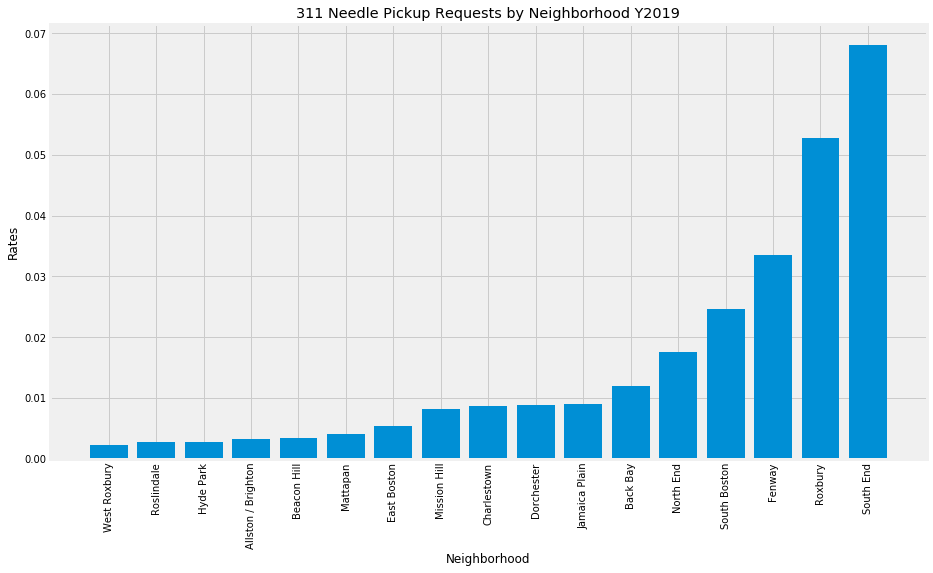

In [29]:
melt_2019.sort_values("needle_pickup_percentage", inplace=True)
fig, ax = plt.subplots(figsize=(14,8))

# Plot a bar-chart 
ax.bar(melt_2019["variable"], melt_2019["needle_pickup_percentage"])

# Set the y-axis label
ax.set_xlabel('Neighborhood')
ax.set_ylabel("Rates")
ax.set_title("311 Needle Pickup Requests by Neighborhood Y2019")

plt.xticks(rotation=90)
plt.show()

By 10th of October 2019, people in South End had sent the most needle pickup requests to 311, making up nearly 7% of the total 311 requests in the neighborhood. 

# % of Needle Pickup Requests from 2015 to 2019

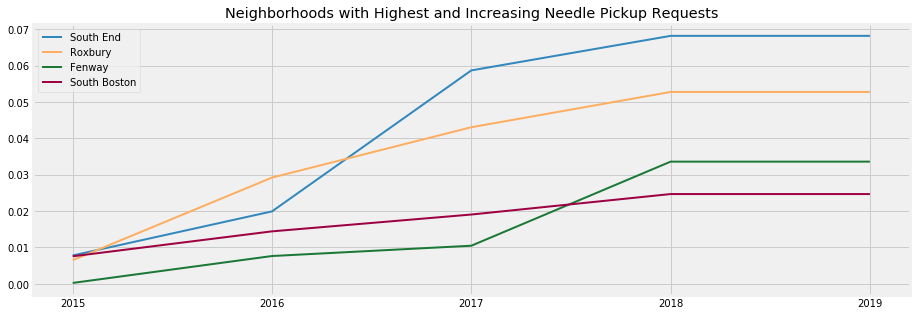

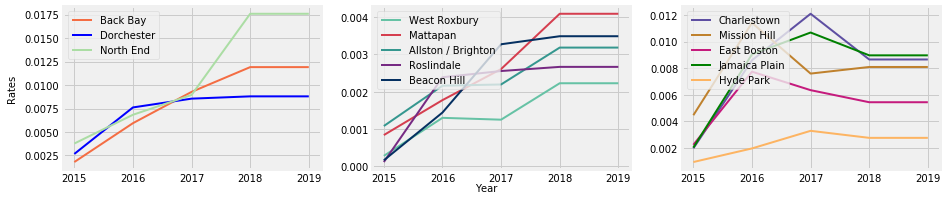

In [69]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot( 'year', "South End", data=df_percent, color="#3288bd", linewidth=2 , label="South End")
ax.plot( 'year', "Roxbury", data=df_percent, color="#fdae61", linewidth=2 , label="Roxbury")
ax.plot( 'year', "Fenway", data=df_percent, color="#1b7837", linewidth=2 , label="Fenway")
ax.plot( 'year', "South Boston", data=df_percent, color="#9e0142", linewidth=2 , label="South Boston")
ax.set_title("Neighborhoods with Highest and Increasing Needle Pickup Requests")
ax.legend(loc='upper left')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))
axes[0].plot( 'year', "Back Bay", data=df_percent, color="#f46d43", linewidth=2 , label="Back Bay")
axes[0].plot( 'year', "Dorchester", data=df_percent, color="blue", linewidth=2 , label="Dorchester")
axes[0].plot( 'year', "North End", data=df_percent, color="#abdda4", linewidth=2 , label="North End")
axes[0].legend(loc='upper left')

axes[1].plot( 'year', "West Roxbury", data=df_percent, color="#66c2a5", linewidth=2 , label="West Roxbury")
axes[1].plot( 'year', "Mattapan", data=df_percent, color="#d53e4f", linewidth=2 , label="Mattapan")
axes[1].plot( 'year', "Allston / Brighton", data=df_percent, color="#35978f", linewidth=2 , label="Allston / Brighton")
axes[1].plot( 'year', "Roslindale", data=df_percent, color="#762a83", linewidth=2 , label="Roslindale")
axes[1].plot( 'year', "Beacon Hill", data=df_percent, color="#053061", linewidth=2 , label="Beacon Hill")
axes[1].legend(loc='upper left')

axes[2].plot( 'year', "Charlestown", data=df_percent, color="#5e4fa2", linewidth=2 , label="Charlestown")
axes[2].plot( 'year', "Mission Hill", data=df_percent, color="#bf812d", linewidth=2 , label="Mission Hill")
axes[2].plot( 'year', "East Boston", data=df_percent, color="#c51b7d", linewidth=2 , label="East Boston")
axes[2].plot( 'year', "Jamaica Plain", data=df_percent, color="green", linewidth=2 , label="Jamaica Plain")
axes[2].plot( 'year', "Hyde Park", data=df_percent, color="#fdb462", linewidth=2 , label="Hyde Park")
axes[2].legend(loc='upper left')

fig.text(0.5,0.04, "Year", ha="center", va="center")
fig.text(0.03,0.5, "Rates", ha="center", va="center", rotation=90)
plt.show()


# Where were the needle reported? 

<img src="needle_map.png">

Next Step for Mapping:

- Plot the open space area, schools, parks
- Also, according to [this news](https://www.wbur.org/news/2015/08/26/boston-needle-search-opioids), needles are often found in areas with more homeless services, medical services, addiction services etc. Because people are not allowed to bring syringes into these shelters. Try to plot these places. 

# The Relationship between Needle Pickup and Other Social Factors

In [32]:
# Read in the social vulnerability dataset 
#(I calcuated the percentage by dividing each number with the total population in the neighborhood)
soc_vul = pd.read_csv("social_vul_percent_by_neighborhood.csv", index_col=0)

In [33]:
soc_vul

,Disability%,Child%,OlderAdult%,Low_to_No_Income%,LimitEngPro%,PplOfColor%,MedIllnes
Mission Hill,0.098113,0.087394,0.067550,0.392851,0.460400,0.470588,0.375085
Fenway,0.045220,0.017844,0.015844,0.214600,0.230445,0.352761,0.372037
Back Bay,0.066075,0.058881,0.131278,0.185653,0.316931,0.241776,0.413598
Allston / Brighton,0.086270,0.064564,0.087571,0.297707,0.385278,0.332963,0.391280
Jamaica Plain,0.108163,0.172777,0.103690,0.307330,0.411020,0.526544,0.392904
Roslindale,0.119496,0.218523,0.134994,0.184491,0.319486,0.542962,0.394098
Hyde Park,0.127645,0.196322,0.133796,0.161773,0.295568,0.671209,0.386642
West Roxbury,0.112409,0.207302,0.158243,0.157808,0.316051,0.397395,0.395560
Mattapan,0.169320,0.267619,0.123040,0.287920,0.410960,0.854182,0.374494
Dorchester,0.140885,0.250004,0.093766,0.326408,0.420174,0.728575,0.358860


In [34]:
# Calculate percentage of needle pickup requests from 2015 to 2019 
ls_all = cal_year_neighbor(needle_sub, df)

In [35]:
# Make it a dataframe 
total_percent = {
    "neighborhood": ls,
    "needle_pickup_request%": ls_all
}

total_requests_percent = pd.DataFrame(total_percent)

In [36]:
# Set the index of the needle pickup dataframe to be neighborhoods
total_requests_percent.set_index("neighborhood", inplace=True)

In [37]:
# Merge the two dataset
mer_soc_needle = pd.merge(soc_vul, total_requests_percent, left_index=True, right_index=True, how="right")

In [38]:
# Calculate correlations
corr = mer_soc_needle.corr(method="pearson").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlOrRd'), axis=1)

In [39]:
corr

,Disability%,Child%,OlderAdult%,Low_to_No_Income%,LimitEngPro%,PplOfColor%,MedIllnes,needle_pickup_request%
Disability%,1.0,0.91,0.33,0.44,0.64,0.89,-0.55,-0.13
Child%,0.91,1.0,0.42,0.23,0.45,0.73,-0.47,-0.076
OlderAdult%,0.33,0.42,1.0,-0.46,-0.066,0.0089,0.51,-0.3
Low_to_No_Income%,0.44,0.23,-0.46,1.0,0.92,0.5,-0.65,0.12
LimitEngPro%,0.64,0.45,-0.066,0.92,1.0,0.57,-0.5,0.002
PplOfColor%,0.89,0.73,0.0089,0.5,0.57,1.0,-0.75,-0.24
MedIllnes,-0.55,-0.47,0.51,-0.65,-0.5,-0.75,1.0,0.071
needle_pickup_request%,-0.13,-0.076,-0.3,0.12,0.002,-0.24,0.071,1.0


From the correlation above, there's no strong correlations between the needle pickup requests rates and other social factors. 

# The Relationship between Needle Pickup and Unsatisfactory Living Condition

In [40]:
df_311 = pd.read_csv("311_typePercent_byDistrict.csv", index_col=0)

In [41]:
unsat = df_311[["unsatisfactory_living%"]] 

In [42]:
unsat.head()

,unsatisfactory_living%
West Roxbury,0.004987
Hyde Park,0.014896
Dorchester,0.023405
Jamaica Plain,0.012792
Fenway,0.017361


In [43]:
unsat_needle = pd.merge(unsat, total_requests_percent, left_index=True, right_index=True, how="right")
corr_unsat_needle = unsat_needle.corr(method="pearson")

In [44]:
corr_unsat_needle

,unsatisfactory_living%,needle_pickup_request%
unsatisfactory_living%,1.000000,-0.041587
needle_pickup_request%,-0.041587,1.000000


From the correlation above, there's no strong correlations between the needle pickup requests rates and the unsatisfactory living complaints rates from the 311 data. 

# The Relationship between Needle Pickup and Temperature

Surface temperature data source: https://github.com/nprapps/heat-income

In [45]:
surf_temp = pd.read_csv("boston_heat_byNeighborhood.csv", index_col=0)

In [46]:
surf_temp.set_index("neighborhood", inplace=True)

In [47]:
temp_needle = pd.merge(surf_temp, total_requests_percent, left_index=True, right_index=True, how="left")

In [48]:
temp_needle.head()

,mean_degree,needle_pickup_request%
neighborhood,,
Allston / Brighton,34.527632,0.001761
Fenway,35.508725,0.016137
Back Bay,34.761540,0.009460
Beacon Hill,32.904764,0.001863
West End,32.968835,NaN


In [49]:
corr_temp_needle = temp_needle.corr(method="pearson")

In [50]:
corr_temp_needle

,mean_degree,needle_pickup_request%
mean_degree,1.00000,0.44132
needle_pickup_request%,0.44132,1.00000


#### Moderate Correlation between Surface Temperature and Needle Appearance?

The data shows that the correlation between surface temperature in different neighborhoods and needle pickup requests rates is 44%. Let's plot a scatterplot based on these figures. 

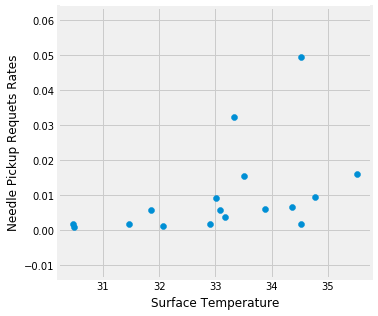

In [61]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(temp_needle["mean_degree"], temp_needle["needle_pickup_request%"])

plt.xlabel("Surface Temperature")
plt.ylabel("Needle Pickup Requets Rates")

plt.show()

#### Is there a correlation between heat and durg addiction?

I downloaded data from crime incident report (https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system) and sliced a subset of data where the offense descriptions are sick assistance related to drugs. 

I cleaned the dataset and aggregated the number of sick assistance related to drugs in differnet neighborhoods.

The subset only contains 11 neighborhoods, including 'North End', 'Roxbury', 'South End', 'South Boston', 'Dorchester', 'West Roxbury', 'East Boston', 'Jamaica Plain', 'Brighton', 'Hyde Park', and 'Mattapan'.

In [52]:
# Load in the data 
drug_sick = pd.read_csv("total_drug_byNeighborhoods.csv", index_col=0)

In [53]:
drug_sick = drug_sick.set_index("neighborhood")

In [54]:
drug_sick

,drug_sick_assist_number
neighborhood,
North End,242
Roxbury,405
South End,189
South Boston,238
Dorchester,318
West Roxbury,137
East Boston,119
Jamaica Plain,136
Brighton,101


In [55]:
# Merge the surface temperature of Boston and the sick assitance of drugs 
temp_drug_assist = pd.merge(surf_temp, drug_sick, left_index=True, right_index=True, how="right")

In [56]:
temp_drug_assist

,mean_degree,drug_sick_assist_number
neighborhood,,
North End,33.007627,242
Roxbury,33.328559,405
South End,34.516036,189
South Boston,33.505518,238
Dorchester,33.083289,318
West Roxbury,30.486697,137
East Boston,33.173010,119
Jamaica Plain,31.856841,136
Brighton,NaN,101


In [57]:
# Calculate correlations
corr_temp_drug_assist = temp_drug_assist.corr()

In [58]:
corr_temp_drug_assist

,mean_degree,drug_sick_assist_number
mean_degree,1.000000,0.571282
drug_sick_assist_number,0.571282,1.000000


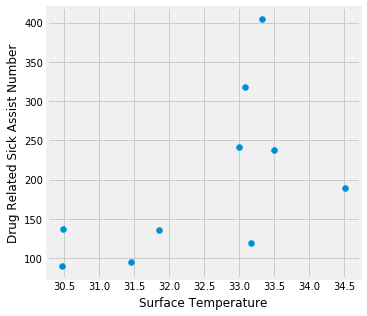

In [60]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(temp_drug_assist["mean_degree"], temp_drug_assist["drug_sick_assist_number"])

plt.xlabel("Surface Temperature")
plt.ylabel("Drug Related Sick Assist Number")

plt.show()

The data shows that the correlation between surface temperature in different neighborhoods and number of sick assistance of drugs is 57%. 